# Verifying MEG-MRI Coregistration

This notebook demonstrates how to visually verify the accuracy of MEG-MRI coregistration using the `verify_coregistration()` function from `lameg.viz`.

The function renders the subject's cortical, scalp, and skull surfaces alongside MEG fiducial landmarks (nasion, LPA, RPA) in an interactive 3D scene using `k3d`. This visualization helps confirm that the MRI segmentation and MEG head coordinate alignment have been performed correctly.

In [1]:
from IPython.display import Image
import base64

from lameg.surf import LayerSurfaceSet
from lameg.util import get_fiducial_coords
from lameg.viz import verify_coregistration

In [2]:
%env SUBJECTS_DIR=../test_data/fs

env: SUBJECTS_DIR=../test_data/fs


## Initialize the Subject's Surface Set

We begin by creating a `LayerSurfaceSet` for the subject. This object provides paths and metadata for all cortical and head meshes (pial, white matter, skull, scalp, etc.), and ensures consistent access to the FreeSurfer-derived surfaces.

In [3]:
subj_id='sub-104'
surf_set = LayerSurfaceSet(subj_id, 11)

## Load Fiducial Landmarks

Fiducial coordinates correspond to the MEG head-space positions of:
- **Nasion (NAS)**
- **Left Preauricular (LPA)**
- **Right Preauricular (RPA)**

They are typically defined by the digitized headshape or by the `coregister_3d_scan_mri()` function from `lameg.util`.
Here we load them directly from the project's `participants.tsv` file using `get_fiducial_coords()`.

In [4]:
fid_coords = get_fiducial_coords(subj_id, '../test_data/participants.tsv')
print(fid_coords)

{'nas': [-2.448184, 117.891385, 8.210301], 'lpa': [-74.534153, 24.382267, -15.896578], 'rpa': [75.167465, 33.04979, -27.065764]}


## Visualize Coregistration

The `verify_coregistration()` function displays:
- The **pial surface** (gray, opaque)
- The **scalp** (tan, semi-transparent)
- The **inner and outer skull** surfaces (white, semi-transparent)
- Fiducial markers:
  - Nasion (blue)
  - LPA (red)
  - RPA (green)

This allows quick visual confirmation that fiducial locations correspond to the correct anatomical landmarks.

In [5]:
plot = verify_coregistration(fid_coords, surf_set)

Output()

In [7]:
plot.fetch_screenshot()

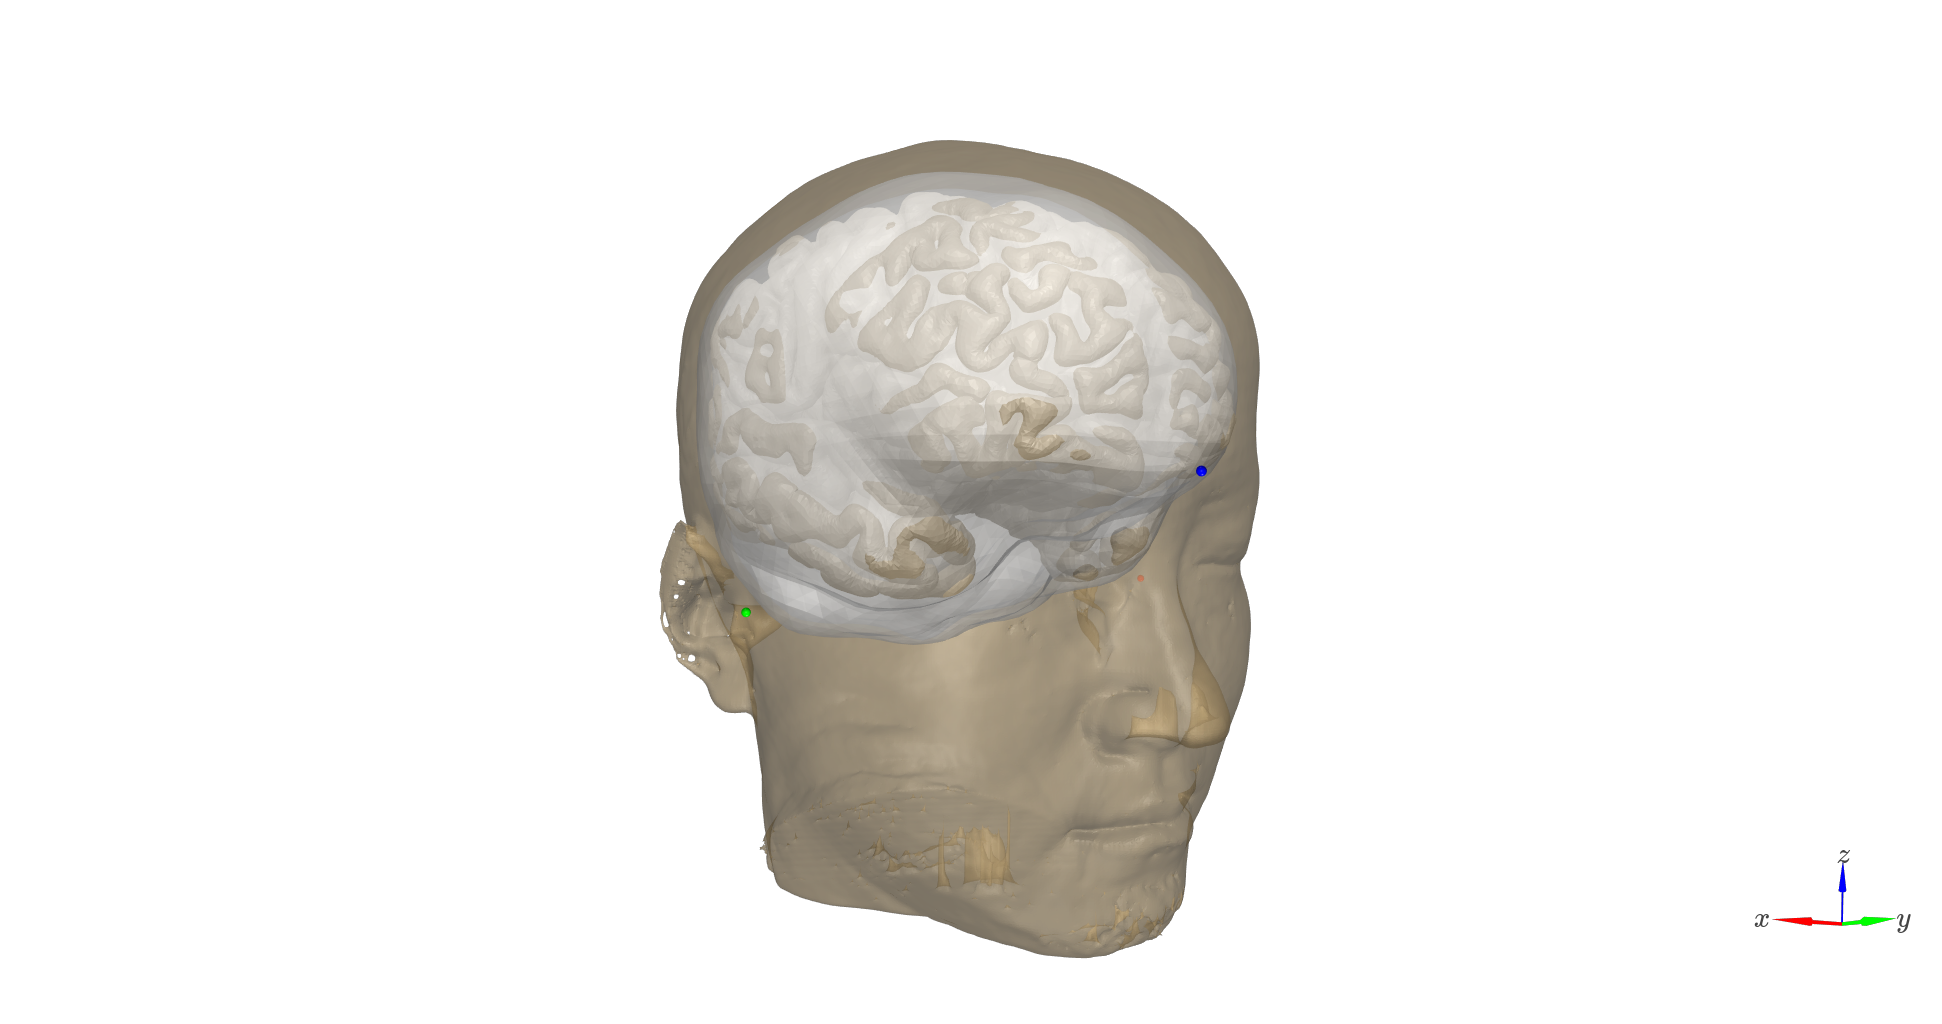

In [8]:
Image(data=base64.b64decode(plot.screenshot))

### Interpretation

- The fiducial spheres should align with their respective anatomical landmarks on the scalp.
- The MEG head coordinate frame (defined by these fiducials) should roughly align with the MRI-based head meshes.
- If any of the skull or scalp surfaces appear misaligned, re-run segmentation or coregistration for this subject.

> **Note:** This visualization does not modify data - it serves purely as a diagnostic tool.